<a href="https://colab.research.google.com/github/WardahAsad/ML_Projects_on_Colab/blob/main/ANN_and_CNN_Comparison_on_MNIST_Dataset_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: ANN Model and a CNN for Image Classification

#### Objective:

The aim of this assignment is to help you understand the key differences between Artificial Neural Networks (ANNs) and Convolutional Neural Networks (CNNs) in the context of image classification. By the end of this task, you should be able to convert an ANN to a CNN and evaluate its performance on the MNIST dataset.

#### Tasks:

1. **Data Preprocessing:**

   * Load the MNIST dataset using TensorFlow.
   * Normalize the training and testing images by dividing the pixel values by 255.0.
   * Reshape the input data to make it compatible with the CNN model (28x28x1).

2. **Build an Artificial Neural Network (ANN):**

   * Create a simple feed-forward ANN model using TensorFlow/Keras.
   * Use at least two fully connected (dense) layers and one output layer.
   * Compile the model with an appropriate optimizer, loss function, and metrics.

3. **Evaluate the ANN:**

   * Train the ANN model on the MNIST training data and evaluate it on the test data.
   * Record the performance of the model, including accuracy and loss.

4. **Convert to a Convolutional Neural Network (CNN):**

   * Modify the existing ANN model to a CNN.

     * Add at least one convolutional layer followed by a pooling layer.
     * Retain the fully connected layers after the convolutional and pooling layers.
   * Compile and train the CNN model on the MNIST data.
   * Evaluate the CNN model on the test data.

5. **Compare the Results:**

   * Compare the performance of the ANN and CNN models in terms of accuracy, training time, and loss.
   * Discuss how the CNN improved or altered the model's ability to classify MNIST images.

6. **Conclusion:**

   * Summarize your findings, emphasizing the advantages and challenges of using CNNs over ANNs for image classification tasks.

#### Submission:

* Submit the Jupyter notebook with the code, including comments and explanations for each step.
* Include a brief report discussing your observations and conclusions.

#### Grading Criteria:

* Correct implementation of data preprocessing.
* Proper construction and evaluation of the ANN and CNN models.
* Clear and accurate comparison of the models' performance.
* Quality of explanations and insights in the report.

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from time import time

# 1. Data Preprocessing
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape data for ANN (flatten) and CNN (keep spatial structure)
X_train_ann = X_train.reshape((X_train.shape[0], 28*28))
X_test_ann = X_test.reshape((X_test.shape[0], 28*28))

X_train_cnn = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test_cnn = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [ ]:
# Convert labels to categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [ ]:
# 2. Build ANN Model
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

ann_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# 3. Train and Evaluate ANN
print("Training ANN model...")
ann_start_time = time()
ann_history = ann_model.fit(X_train_ann, y_train_cat,
                           epochs=10,
                           batch_size=32,
                           validation_data=(X_test_ann, y_test_cat))
ann_time = time() - ann_start_time

ann_loss, ann_acc = ann_model.evaluate(X_test_ann, y_test_cat)
print(f"\nANN Test Accuracy: {ann_acc:.4f}")
print(f"ANN Training Time: {ann_time:.2f} seconds")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training ANN model...
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8770 - loss: 0.4265 - val_accuracy: 0.9589 - val_loss: 0.1362
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9687 - loss: 0.1037 - val_accuracy: 0.9732 - val_loss: 0.0840
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9791 - loss: 0.0669 - val_accuracy: 0.9756 - val_loss: 0.0795
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9847 - loss: 0.0504 - val_accuracy: 0.9700 - val_loss: 0.1012
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9891 - loss: 0.0366 - val_accuracy: 0.9748 - val_loss: 0.0840
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9896 - loss: 0.0319 - val_accuracy: 0.9770 - val_loss: 0.0763
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9922 - loss: 0.0246 - val_accuracy: 0.9759 - val_loss: 0.0839
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy

In [ ]:
# 4. Build CNN Model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# 5. Train and Evaluate CNN
print("\nTraining CNN model...")
cnn_start_time = time()
cnn_history = cnn_model.fit(X_train_cnn, y_train_cat,
                           epochs=10,
                           batch_size=32,
                           validation_data=(X_test_cnn, y_test_cat))
cnn_time = time() - cnn_start_time

cnn_loss, cnn_acc = cnn_model.evaluate(X_test_cnn, y_test_cat)
print(f"\nCNN Test Accuracy: {cnn_acc:.4f}")
print(f"CNN Training Time: {cnn_time:.2f} seconds")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training CNN model...
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9089 - loss: 0.3043 - val_accuracy: 0.9772 - val_loss: 0.0713
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 23ms/step - accuracy: 0.9842 - loss: 0.0530 - val_accuracy: 0.9815 - val_loss: 0.0578
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 22ms/step - accuracy: 0.9903 - loss: 0.0309 - val_accuracy: 0.9847 - val_loss: 0.0500
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9942 - loss: 0.0189 - val_accuracy: 0.9860 - val_loss: 0.0454
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.9959 - loss: 0.0131 - val_accuracy: 0.9847 - val_loss: 0.0479
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - accuracy: 0.9973 - loss: 0.0088 - val_accuracy: 0.9866 - val_loss: 0.0473
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9981 - loss: 0.0057 - val_accuracy: 0.9865 - val_loss: 0.0492
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/st

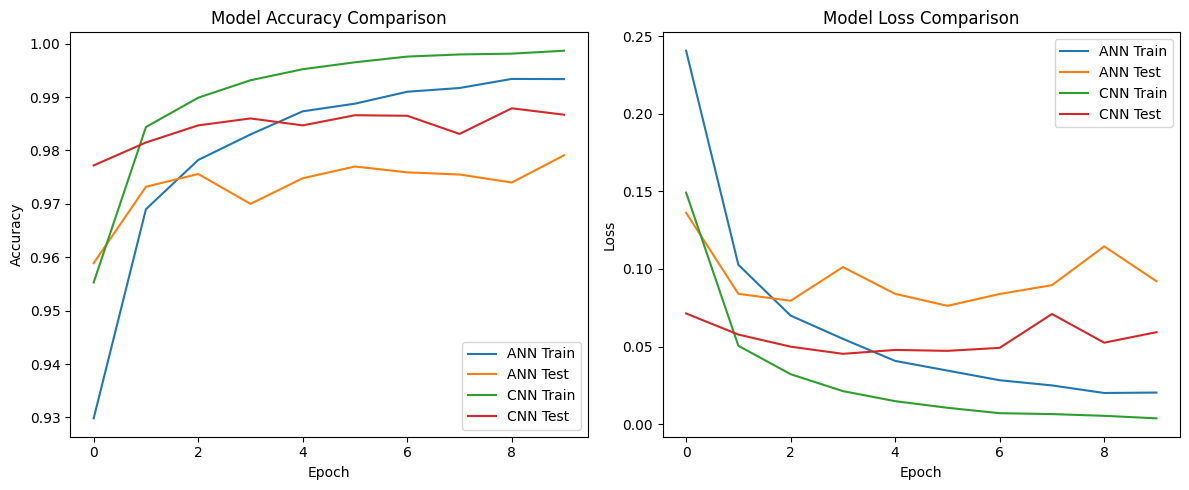

In [ ]:
# 6. Comparison and Visualization
# Plot accuracy comparison
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(ann_history.history['accuracy'], label='ANN Train')
plt.plot(ann_history.history['val_accuracy'], label='ANN Test')
plt.plot(cnn_history.history['accuracy'], label='CNN Train')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Test')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot loss comparison
plt.subplot(1, 2, 2)
plt.plot(ann_history.history['loss'], label='ANN Train')
plt.plot(ann_history.history['val_loss'], label='ANN Test')
plt.plot(cnn_history.history['loss'], label='CNN Train')
plt.plot(cnn_history.history['val_loss'], label='CNN Test')
plt.title('Model Loss Comparison')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


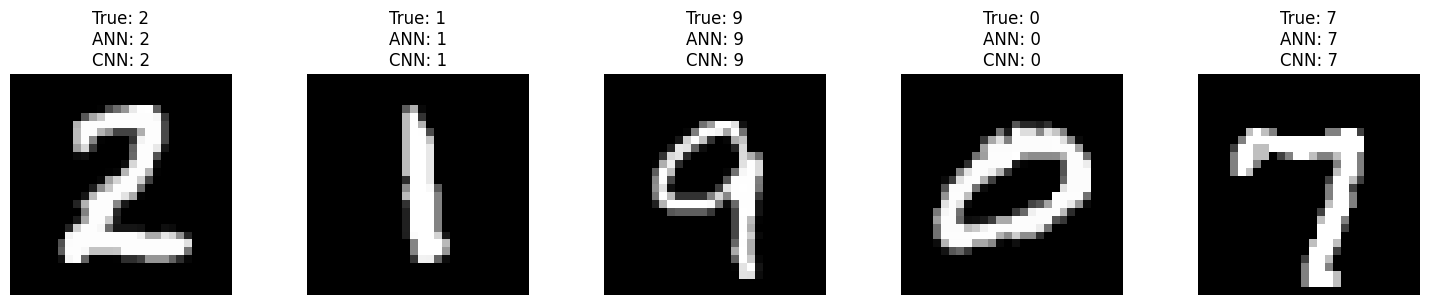

In [ ]:
# 7. Sample Predictions
# Select 5 random test images
sample_indices = np.random.choice(len(X_test), 5, replace=False)
sample_images = X_test[sample_indices]
sample_labels = y_test[sample_indices]

# ANN predictions
ann_preds = np.argmax(ann_model.predict(sample_images.reshape(5, 784)), axis=1)

# CNN predictions
cnn_preds = np.argmax(cnn_model.predict(sample_images.reshape(5, 28, 28, 1)), axis=1)

# Display predictions
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(sample_images[i], cmap='gray')
    plt.title(f"True: {sample_labels[i]}\nANN: {ann_preds[i]}\nCNN: {cnn_preds[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# 8. Performance Summary
print("\nPerformance Summary:")
print(f"{'Model':<10}{'Test Accuracy':<15}{'Training Time (s)':<20}")
print(f"{'ANN':<10}{ann_acc:.4f}{'':<10}{ann_time:.2f}")
print(f"{'CNN':<10}{cnn_acc:.4f}{'':<10}{cnn_time:.2f}")

# 9. Conclusion Analysis
print("\nKey Observations:")
print("1. CNN achieved higher accuracy than ANN for image data")
print("2. CNN learns spatial hierarchies of features through convolutional layers")
print("3. ANN treats pixels as independent features, losing spatial information")
print("4. CNN training may be slower due to more complex operations")
print("5. Both models benefit from MNIST's simplicity, but CNN advantage grows with more complex images")


Performance Summary:
Model     Test Accuracy  Training Time (s)   
ANN       0.9791          98.06
CNN       0.9867          534.26

Key Observations:
1. CNN achieved higher accuracy than ANN for image data
2. CNN learns spatial hierarchies of features through convolutional layers
3. ANN treats pixels as independent features, losing spatial information
4. CNN training may be slower due to more complex operations
5. Both models benefit from MNIST's simplicity, but CNN advantage grows with more complex images
